<a href="https://colab.research.google.com/github/StephenBrom54/MLA_SEB/blob/main/MLA3_SEB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,  recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
from sklearn import set_config
set_config(display='diagram')

In [13]:
def plot_cm(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  fig = plt.figure(figsize=(10,10))
  heatmap = sns.heatmap(cm, annot= true, fmt= '.2f', cmap='RdYlGn')
  plt.ylabel('True label')
  plt.xlabel('Predicted Label')

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
#df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

In [16]:
df.describe()

,variance,skewness,curtosis,entropy,forgery
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [17]:
forgeryvsnoforgery = df['forgery'].groupby(df['forgery']).count()
forgeryvsnoforgery

forgery
0    762
1    610
Name: forgery, dtype: int64

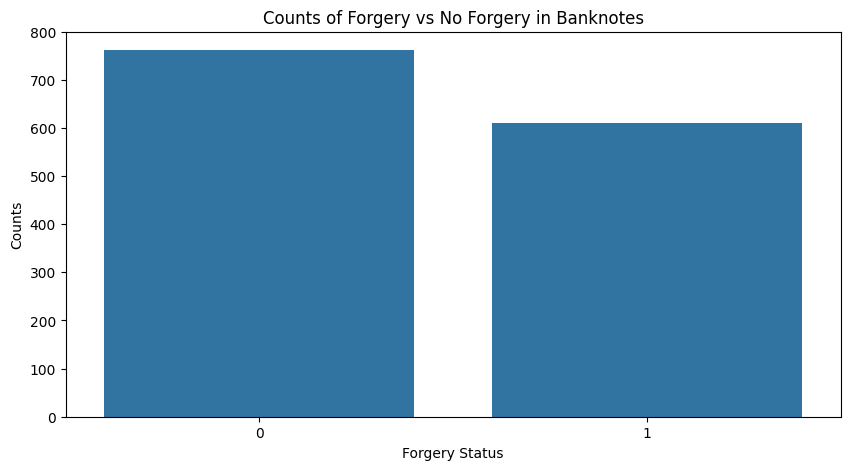

In [18]:
forgery_counts = df['forgery'].value_counts().rename_axis('forgery').reset_index(name='counts')

plt.figure(figsize=(10, 5))
sns.barplot(x='forgery', y='counts', data=forgery_counts)
plt.title('Counts of Forgery vs No Forgery in Banknotes')
plt.xlabel('Forgery Status')
plt.ylabel('Counts')
plt.show()

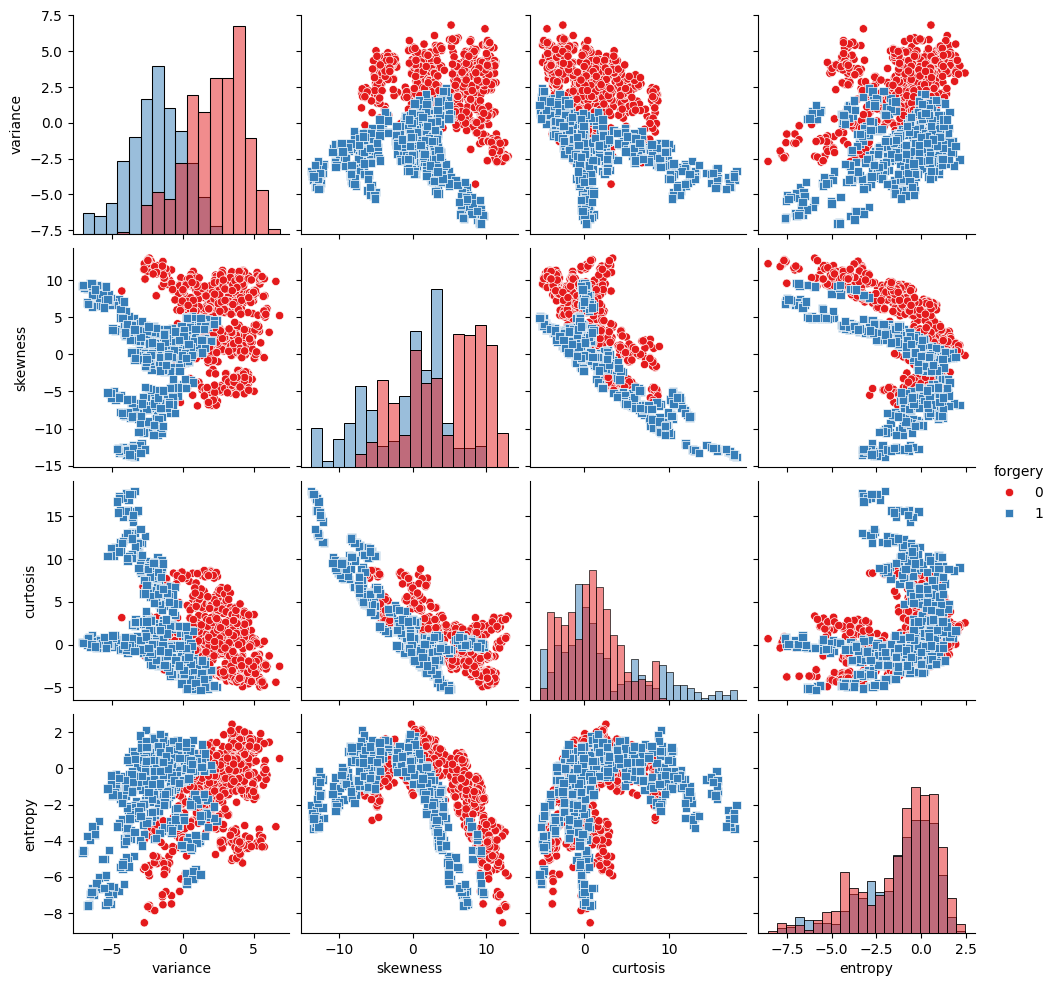

In [19]:
sns.pairplot(df, hue="forgery", palette="Set1", diag_kind="hist", markers=["o", "s"])
plt.show()

**MarkDown Comments:** These have very strong ways of determing between forgery and non forgery. These will make for great ways of learning and predicting in ML

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [22]:
X = df.drop(columns=['forgery'])
y = df['forgery']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [24]:
column_transformer = ColumnTransformer([
    ("scaler", MinMaxScaler(), list(X.columns))
])

In [25]:
pipeline = Pipeline(steps=[
    ("transformer", column_transformer),
    ("svm", SVC(kernel="linear", random_state=42))
])

In [26]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('svm', SVC(kernel='linear', random_state=42))])

In [27]:
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)
y_pred = logit_model.predict(X_test)

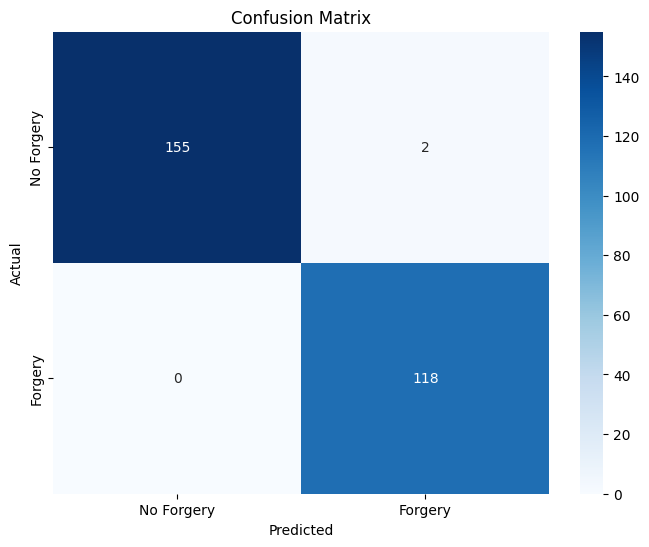

In [28]:
def plot_cm(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

plot_cm(y_test, y_pred, class_names=['No Forgery', 'Forgery'])

In [29]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.9833333333333333
Recall: 1.0
F1 Score: 0.9915966386554621


**MarkDown Comments:** These are very strong correlations. This is a grate predicting modle

In [30]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')

In [31]:
column_name_mapping = {
    'Usage_kWh': 'usage_kwh',
    'Lagging_Current_Reactive.Power_kVarh': 'lag_react_pwr_kvarh',
    'Leading_Current_Reactive_Power_kVarh': 'lead_react_pwr_kvarh',
    'Lagging_Current_Power_Factor': 'lag_current_pwr',
    'Leading_Current_Power_Factor': 'lead_current_pwr',
    'NSM': 'nsm',
    'WeekStatus': 'week_status',
    'Day_of_week': 'day_of_week',
    'Load_Type': 'load_type'
}

df.rename(columns=column_name_mapping, inplace=True)

print(df.columns)

Index(['date', 'usage_kwh', 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh',
       'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm',
       'week_status', 'day_of_week', 'load_type'],
      dtype='object')


In [32]:
X = df.drop(['date', 'usage_kwh'], axis=1)
y = df['usage_kwh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df.head()

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [33]:
categorical_features = ['week_status', 'day_of_week', 'load_type']
numerical_features = X.columns.difference(categorical_features)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

In [34]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='linear'))
])

In [35]:

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [36]:
y_pred_test = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

In [38]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print (rmse_test)
print (rmse_train)

4.243092841975303
4.853793163690413


** Markdown Comments:** With these scores, it is a resonable model of prediction.